# Task3- Explore Unsupervised ML

## Import Packages

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

## Load the dataset

In [20]:
data = datasets.load_iris()
data_df = pd.DataFrame(data.data, columns = data.feature_names)
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Model Building & Plotting

How do you find the optimum number of clusters for K Means? How does one determine the value of K?

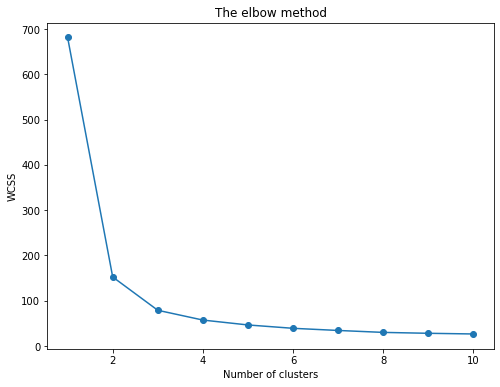

In [27]:
from sklearn.cluster import KMeans
x=data_df.iloc[:,[0,1,2,3]].values

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0) #creating a kmeans instance with i clusters
    kmeans.fit(x) #fitting model to samples
    wcss.append(kmeans.inertia_) #appending the inertia to the list of wcss
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, "-o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [32]:
# From the graph we can see that the elbow starts at 3. So number of clusters are 3
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

## Visualization

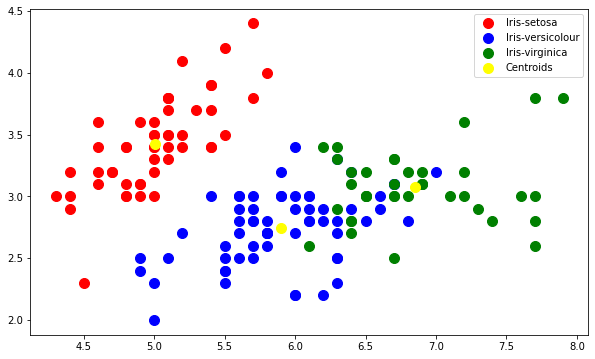

In [35]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=[10,6])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()